# División en conjuntos

A la hora de entrenar modelos de Inteligenia Artificial, debemos imaginarnos todos los modelos como _alumnos_ que intentan aprender algo directamente de los datos que tienen. Por ello, necesitamos preparar el _entrenamiento_, pero también pruebas para ver el avance y _test_ finales (exámenes finales).

Estos grupos de datos se denominan, respectivamente: **entrenamiento**, **evaluación** y **testeo**. Y existen muchas formas de crearlos. La elección de estas técnicas dependen de la cantidad de datos o de su **estratificación**, es decir, en cómo están divididos estos datos.

En este cuadernillo, veremos las siguientes técnicas de división del conjunto de datos en **entrenamiento**, **validación** y **testeo**:
- _Train-test split_
- _K-Flod_
- _Repeated K-Fold_
- _Stratified train test split_
- _Stratified KFold_
- _Stratified Repeated K-Fold_

## Train-test split

Cuando tenemos una gran cantidad de datos y podemos separarlos en dos conjuntos de forma que el de **entrenamiento** sea lo suficientemente grande como para poder crear un modelo exitoso, utilizamos esta técnica.

Básicamente, se divide el conjunto total en tres conjuntos diferentes:
- Se usa el conjunto de **entrenamiento** para entrenar el modelo, son los datos con la máxima información posible.
- Se usa el conjunto de **evaluación** para ver cómo está entrenando el modelo, se conoce el resultado esperado, pero **NO** se usa para entrenar el modelo, solo para comparar lo obtenido con lo deseado.
- Se usa el conjunto de **testeo** para realizar la prueba final con el modelo, **nunca** se debe utilizar para tomar decisiones o cambiar el modo de entrenamiento, dado que puede provocar problemas de _overfitting_ (lo veremos más tarde: que el modelo se _aprenda de memoria_ los datos de entrenamiento y **NO** sea capaz de generalizar despuñes).

En general, el conjunto de **testeo** se suele dar a parte (por ejemplo, en Kaggle os lo daba en un fichero a parte), mientras que el de **entrenamiento** y **evaluación** lo debemos crear nosotros con los datos de **entrenamiento**. Si no nos diesen un conjunto de **testeo**, deberíamos reservarlo nosotros también: primero dividiríamos el conjunto total en **entrenamiento** y **testeo**, reservaríamos el de **testeo** para el final y después dividiríamos de nuevo el de **entrenamiento** en **entrenamiento** y **evaluación**.

La división que se suele utilizar es 80% entrenamiento (75% entrenamiento y 15% evaluación) y 20% testeo, pero puedes usar cualquier distribución siempre que la justifiques (y tenga sentido, claro).

Además, como los conjuntos solo se crean una vez utilizando esta técnica, se suelen crear utilizando un ```random_state```, que es una semilla aleatoria para que los conjuntos siempre sean iguales y los resultados sean **reproducibles**. Esta característica es muy importante a la hora de determinar qué modelos funcionan mejor que otros, dado que estarán entrenándose (todos) con los mismos datos.

Para realizar esta división, podemos usar la función ```train_test_split``` de ```sklearn```. Esta función devuelve dos conjuntos por cada conjunto que se le pase, que es justamente la división de **entrenamiento** y **testeo**. Se le puede añadir el porcentaje de datos que queremos para **testeo** o el ```random_state```. Se utiliza así (probemos con los datos del Titanic).

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

random_seed = 33

In [ ]:
df = sns.load_dataset("titanic", cache=False)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=random_seed) # conjunto, tamaño de testeo y semilla aleatoria

Ahora podemos ver los resultados. Fíjate en que los índices se han mezclado. Esto es normal, dado que las instancias están ahora entremezcladas.

In [ ]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
461,0,3,male,34.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
670,1,2,female,40.0,1,1,39.0000,S,Second,woman,False,NaN,Southampton,yes,False
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
664,1,3,male,20.0,1,0,7.9250,S,Third,man,True,NaN,Southampton,yes,False
44,1,3,female,19.0,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True


El conjunto de testeo no deberíamos tocarlo hasta el final.

In [ ]:
test.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
297,0,1,female,2.0,1,2,151.5500,S,First,child,False,C,Southampton,no,False
71,0,3,female,16.0,5,2,46.9000,S,Third,woman,False,NaN,Southampton,no,False
631,0,3,male,51.0,0,0,7.0542,S,Third,man,True,NaN,Southampton,no,True
567,0,3,female,29.0,0,4,21.0750,S,Third,woman,False,NaN,Southampton,no,False
21,1,2,male,34.0,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True


Ahora podemos crear los conjuntos de entrenamiento y validación.

In [ ]:
train, val = train_test_split(train, test_size=0.15, random_state=random_seed)

In [ ]:
train

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
802,1,1,male,11.0,1,2,120.0000,S,First,child,False,B,Southampton,yes,False
91,0,3,male,20.0,0,0,7.8542,S,Third,man,True,NaN,Southampton,no,True
777,1,3,female,5.0,0,0,12.4750,S,Third,child,False,NaN,Southampton,yes,True
775,0,3,male,18.0,0,0,7.7500,S,Third,man,True,NaN,Southampton,no,True
314,0,2,male,43.0,1,1,26.2500,S,Second,man,True,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,0,3,female,32.0,1,1,15.5000,Q,Third,woman,False,NaN,Queenstown,no,False
203,0,3,male,45.5,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
130,0,3,male,33.0,0,0,7.8958,C,Third,man,True,NaN,Cherbourg,no,True
244,0,3,male,30.0,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True


In [ ]:
val

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
197,0,3,male,42.0,0,1,8.4042,S,Third,man,True,NaN,Southampton,no,False
627,1,1,female,21.0,0,0,77.9583,S,First,woman,False,D,Southampton,yes,True
665,0,2,male,32.0,2,0,73.5000,S,Second,man,True,NaN,Southampton,no,False
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
579,1,3,male,32.0,0,0,7.9250,S,Third,man,True,NaN,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0,3,male,19.0,0,0,6.7500,Q,Third,man,True,NaN,Queenstown,no,True
826,0,3,male,NaN,0,0,56.4958,S,Third,man,True,NaN,Southampton,no,True
738,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
208,1,3,female,16.0,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True


Es **muy importante** percatarse de los distintos detalles:
- El conjunto de **testeo** **NUNCA** debe tocarse para tomar decisiones del entrenamiento.
- El conjunto de **validación** debe utilizarse para evaluar si los cambios del entrenamiento son buenos o no. Las evaluaciones sobre el conjunto de **entrenamiento** no son tan explicativas como lo son sobre el conjunto de **validación**. Previsiblemente, una evaluación sobre el conjunto de **validación** será mejor que una evaluación sobre el conjunto de **validación**.
- El preprocesamiento de la información debe realizarse, únicamente, utilizando el conjunto de entrenamiento (para elegir el modelo) y los conjuntos de entrenamiento y validación (para testearlo). Por ejemplo, se deben imputar los valores usando el ```Imputer``` entrenado con el conjunto de **entrenamiento**, **NO** el de **testeo**.
- **NUNCA** se deben eliminar datos del conjunto de testeo (columnas sí, instancias **NO**).

A continuación, tienes un ejemplo.

In [ ]:
train.head() # datos iniciales

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
802,1,1,male,11.0,1,2,120.0000,S,First,child,False,B,Southampton,yes,False
91,0,3,male,20.0,0,0,7.8542,S,Third,man,True,NaN,Southampton,no,True
777,1,3,female,5.0,0,0,12.4750,S,Third,child,False,NaN,Southampton,yes,True
775,0,3,male,18.0,0,0,7.7500,S,Third,man,True,NaN,Southampton,no,True
314,0,2,male,43.0,1,1,26.2500,S,Second,man,True,NaN,Southampton,no,False


Voy a usar las funciones del tema 2 para limpiar.

In [ ]:
import math
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def binary_categorizer(dataframe, column, code_map: dict = None, cols: int = None):
  result = []
  if not cols: cols = math.ceil(math.log2(len(dataframe[column].unique())))
  if not code_map: code_map = {value: key for key, value in enumerate(dataframe[column].unique())}

  for value in dataframe[column]:
    code = code_map[value]
    b_code = format(code, "b")

    if len(b_code) > cols:
      raise Exception(f"El número de columnas ({cols}) es demasiado pequeño para empaquetar la información ({len(b_code)}). Modifica el valor del atributo cols.")

    result.append(list(map(lambda v: int(v), list(b_code.rjust(cols, "0")))))

  new_columns_name = [f"{column}_{i}" for i in range(len(list(result[0])))]
  result_df = pd.DataFrame(result, index=dataframe.index, columns=new_columns_name)
  dataframe = pd.concat([dataframe, result_df], axis=1)
  return dataframe.drop(columns=[column]), code_map

Creo una nueva función que me permite limpiar **ESTE** conjunto de datos, así la podré usar en una linea después y no duplicaré código.

In [ ]:
from numpy import nonzero

def data_cleaner(train, test = None, target = None, standardize: bool = True):
  """
  train: conjunto de entrenamiento
  test: conjunto de testeo
  target: variable a predecir
  standardize: si se debe estandarizar la información o no
  """
  # COLUMNAS INÚTILES Y VALORES SIN SENTIDO
  drop_columns = ["sibsp", "parch", "embarked", "class", "who", "adult_male", "deck"]
  train = train.drop(columns = drop_columns)
  have_test = str(test) != "None"
  if have_test: test = test.drop(columns = drop_columns)

  # VALORES NULOS
  ## train
  _age = train.age.to_numpy().reshape(-1, 1)
  si_age = SimpleImputer().fit(_age)
  train.age = si_age.transform(_age)

  _embark_town = train.embark_town.to_numpy().reshape(-1, 1)
  si_embark_town = SimpleImputer(strategy="most_frequent").fit(_embark_town)
  train.loc[:, "embark_town"] = si_embark_town.transform(_embark_town)

  ## test
  if have_test:
    test.age = si_age.transform(test.age.to_numpy().reshape(-1, 1)) # fijate que uso el mismo si y SOLO USO transform
    test.loc[:, "embark_town"] = si_embark_town.transform(test.embark_town.to_numpy().reshape(-1, 1))

  # categorización de variables
  for df in [train, test] if have_test else [train]:
    df.sex = df.sex.apply(lambda e: 0 if e == "male" else 1) # str -> int
    df.alive = df.alive.apply(lambda e: 0 if e == "no" else 1) # str -> int
    df.alone = df.alone.apply(lambda e: int(e)) # bool -> int

  # categorizacion binaria de variables
  train, code_map = binary_categorizer(train, "embark_town", cols=2) # str -> [int, int]
  if have_test:
    test, _ = binary_categorizer(test, "embark_town", code_map=code_map) # uso el mismo code_map que en el testeo

  # estandarización: separo la variable a predecir para NO modificarla
  if target and standardize:
    train_target = train[[target]]
    train_o = train.drop(columns=[target])
    ss = StandardScaler().fit(train_o) # SOLO el de entrenamiento
    train_o_pred = ss.transform(train_o)
    train_o = pd.DataFrame(train_o_pred, index=train_o.index, columns=train_o.columns)
    train = pd.concat([train_o, train_target], axis=1)

    if have_test:
      test_target = test[[target]]
      test_o = test.drop(columns=[target])
      test_o_pred = ss.transform(test_o) # uso el MISMO que el de entrenamiento
      test_o = pd.DataFrame(test_o_pred, index=test_o.index, columns=test_o.columns)
      test = pd.concat([test_o, test_target], axis=1)

  return (train, test) if have_test else (train, None)

Limpio mis conjuntos de entrenamiento y validación.

In [ ]:
cleaned_train, cleaned_val = data_cleaner(train, val, target="survived")

In [ ]:
cleaned_train

,pclass,sex,age,fare,alive,alone,embark_town_0,embark_town_1,survived
802,-1.563913,-0.737135,-1.498160,1.833346,1.267974,-1.254778,-0.300150,-0.489647,1
91,0.846704,-0.737135,-0.797082,-0.485007,-0.788660,0.796954,-0.300150,-0.489647,0
777,0.846704,1.356604,-1.965545,-0.389483,1.267974,0.796954,-0.300150,-0.489647,1
775,0.846704,-0.737135,-0.952877,-0.487161,-0.788660,0.796954,-0.300150,-0.489647,0
314,-0.358604,-0.737135,0.994562,-0.104717,-0.788660,-1.254778,-0.300150,-0.489647,0
...,...,...,...,...,...,...,...,...,...
657,0.846704,1.356604,0.137689,-0.326948,-0.788660,-1.254778,3.331666,-0.489647,0
203,0.846704,-0.737135,1.189306,-0.498014,-0.788660,0.796954,-0.300150,2.042288,0
130,0.846704,-0.737135,0.215586,-0.484147,-0.788660,0.796954,-0.300150,2.042288,0
244,0.846704,-0.737135,-0.018106,-0.498014,-0.788660,0.796954,-0.300150,2.042288,0


Voy a entrenar un modelo de **clasificación** (sobrevivió la persona o no).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # fíjate en el nombre
from sklearn.metrics import accuracy_score # métrica para clasificación: precisión

In [ ]:
train_X, train_y = cleaned_train.drop(columns=["survived"]), cleaned_train["survived"]

model = KNeighborsClassifier() # creo el modelo
model = model.fit(train_X, train_y) # lo entreno
pred = model.predict(train_X) # resultados de entrenamiento
accuracy_score(train_y, pred) # métrica de entrenamiento

0.9933884297520661

In [ ]:
val_X, val_y = cleaned_val.drop(columns=["survived"]), cleaned_val["survived"]

pred = model.predict(val_X) # no lo reentreno
accuracy_score(val_y, pred) # métrica de evaluación

1.0

Como ves, el resultado de evaluación es algo peor.

Ahora, intentando mejorar aún más estos resultados, podría realizar cambios: probar con otros modelos, probar con otras combinaciones del modelo... Por ejemplo, puedo cambiar el número de vecinos. Fíjate que todavía **NO HE TOCADO PARA NADA** el conjunto de **testeo**.

In [ ]:
model = KNeighborsClassifier(n_neighbors=7) # por defecto es 5
model = model.fit(train_X, train_y)
train_pred = model.predict(train_X)
val_pred = model.predict(val_X)
accuracy_score(train_y, train_pred), accuracy_score(val_y, val_pred)

(0.9917355371900827, 0.9813084112149533)

Los resultados son un poco peores.

**AQUÍ HAGO LAS DEMÁS PRUEBAS Y SOLO CUANDO TENGO MI MODELO DEFINITIVO**:

Predigo el conjunto de testeo, para ello:
- Vuelvo a unir los conjuntos de entrenamiento y validación.
- Limpio el conjunto de testeo.
- Entreno con los parámetros de mi modelo final y predigo el **testeo**.

In [ ]:
df = sns.load_dataset("titanic", cache=False)
train, test = train_test_split(df, test_size=0.2, random_state=random_seed)
train, test = data_cleaner(train, test, "survived")

In [ ]:
train_X, train_y = train.drop(columns=["survived"]), train["survived"]
test_X, test_y = test.drop(columns=["survived"]), test["survived"]

model = KNeighborsClassifier() # el mejor ha sido el por defecto
model = model.fit(train_X, train_y)
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

accuracy_score(train_y, train_pred), accuracy_score(test_y, test_pred)

(0.9943820224719101, 0.9888268156424581)

Resultados obtenidos en **testeo**: 98.89%. Este es el **resultado final**, ya no **DEBO** cambiar nada más.

## K Fold

Aunque la técnica ```train test split``` es una de las que mejor funciona, no nos va a resultar útil si nuestro conjunto de datos tiene poca información. En estos casos, tendremos que reducir _aún más_ nuestro conjunto para utilizar datos para el testeo o la validación. En lugar de eso, podemos utilizar todos los datos para validar y testear de forma cíclica.

La técnica **k fold** se basa en dividir el conjunto de datos en, exáctamente, **k** subconjuntos. Posteriormente, se usarán todos menos uno para entrenar el modelo (se unen, por lo que se pueden volver a separar en **entrenamiento** y **validación**) y el último conjunto, el no unido, para testear. Esta prueba se realiza **k** veces, por lo que estaremos entrenando **k** modelos. Finalmente, se pueden mostrar los resultados de **testeo** para cada _fold_, indicando si el modelo era o no el adecuado.

Es importante hacer notar algunas peculiaridades:
* Utilizando esta técnica, se están usando los datos de **testeo** para seleccionar el modelo, por lo que podemos caer en **sobreajustes**.
* Como se entrenan k modelos para comprobar si esa configuración es la adecuada, este método puede ser **muy lento** en comparación con el método de ```train test split```. Esto puede ser un impedimento físico en otros modelos como las redes neuronales.

Veamos cómo podemos utilizar esta técnica.

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(n_splits=5) # por defecto, k = 5

Ahora, la técnica kfold dividirá el conjunto en 5 partes iguales.

In [ ]:
df = sns.load_dataset("titanic", cache=False) # cargo de nuevo el conjunto de datos

Con el método ```split``` de ```kfold```, ahora puedo crear los conjuntos que voy a necesitar para entrar. Dentro de estos conjuntos, haré los mismos pasos que hacía en el ```train test split```. Este método no devuelve un ```dataframe```, sino una lista de índices (que son las posiciones de los elementos dentro del ```dataframe``` original que se usarán para el entrenamiento y el testeo, respectivamente).

Tenemos que crear nosotros ahora los ```dataframes```.

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=random_seed) # recuerda, el conjunto de teste solo se usa al final

In [ ]:
train_results = []
val_results = []

for train_idx, val_idx in kfold.split(train): # divide el conjunto en 5 partes y devuelve una lista con los índices de cada parte
  sub_train, sub_val = train.iloc[train_idx], train.iloc[val_idx] # recupero los dataframes

  cleaned_train, cleaned_val = data_cleaner(sub_train, sub_val, target = "survived") # limpio los datos de entrenamiento y testeo

  X_train, y_train = cleaned_train.drop(columns=["survived"]), cleaned_train["survived"] # separo los datos (X, y)
  X_val, y_val = cleaned_val.drop(columns=["survived"]), cleaned_val["survived"] # separo los datos (X, y)

  model = KNeighborsClassifier() # creo el modelo
  model = model.fit(X_train, y_train) # lo entreno
  train_results.append(accuracy_score(y_train, model.predict(X_train))) # métrica de entrenamiento
  val_results.append(accuracy_score(y_val, model.predict(X_val))) # métrica de testeo

/tmp/ipython-input-4169932165.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([train_results, val_results], labels=["train", "val"]);


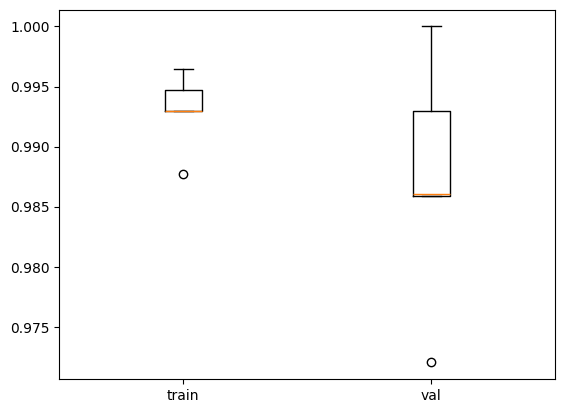

In [ ]:
plt.boxplot([train_results, val_results], labels=["train", "val"]);

Como vemos en el gráfico anterior, los resultados de entrenamiento están más comprimidos que los de validación (esto es normal). Además, observamos también que la línea naranja del conjunto de validación (la media de los _fold_) está más abajo que la de entrenamiento. Esto es completamente normal, dado que los datos de validación son nuevos para el modelo.

Esta combinación de parámetros para el modelo KNN parece buena, podríamos probar otras combinaciones con el mismo bucle que hemos puesto antes.

Al elegir la última, la testearíamos contra el conjunto de test.

## Repeated K Fold

Como su propio nombre indica, podemos aplicar la técnica anterior repetidas veces para obtener resultados aún más fiables. La mecánica es similar.

A cambio de una versión más "segura" de los resultados, la técnica ```RepeatedKFold``` necesitará entrenar muchos más modelos que la técnica anterior.

In [ ]:
from sklearn.model_selection import RepeatedKFold

In [ ]:
rkfold = RepeatedKFold(n_splits=5, n_repeats=10) # 5 divisiones, 10 veces: 50 modelos.

In [ ]:
df = sns.load_dataset("titanic", cache=False) # cargo de nuevo el conjunto de datos
train, test = train_test_split(df, test_size=0.2, random_state=random_seed)

In [ ]:
train_results = []
val_results = []

for train_idx, val_idx in rkfold.split(train): # divide el conjunto en 5 partes con 10 repeticiones y devuelve una lista con los índices de cada parte
  sub_train, sub_val = train.iloc[train_idx], train.iloc[val_idx] # recupero los dataframes

  cleaned_train, cleaned_test = data_cleaner(sub_train, sub_val, target = "survived") # limpio los datos de entrenamiento y testeo

  X_train, y_train = cleaned_train.drop(columns=["survived"]), cleaned_train["survived"] # separo los datos (X, y)
  X_val, y_val = cleaned_test.drop(columns=["survived"]), cleaned_test["survived"] # separo los datos (X, y)

  model = KNeighborsClassifier() # creo el modelo
  model = model.fit(X_train, y_train) # lo entreno
  train_results.append(accuracy_score(y_train, model.predict(X_train))) # métrica de entrenamiento
  val_results.append(accuracy_score(y_val, model.predict(X_val))) # métrica de testeo

/tmp/ipython-input-4169932165.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([train_results, val_results], labels=["train", "val"]);


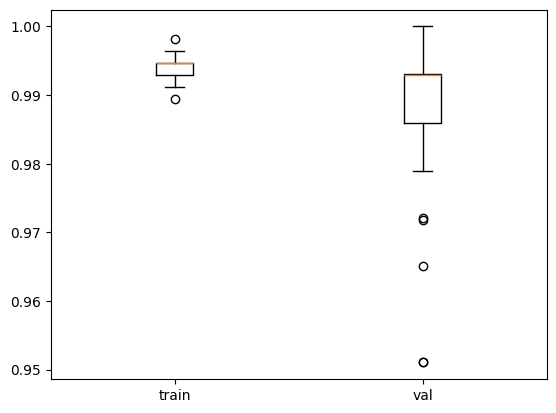

In [ ]:
plt.boxplot([train_results, val_results], labels=["train", "val"]);

En esta aproximación encontramos que ambos modelos tienen una mediana similar. Esto puede estar provocado por un sobreentrenamiento del modelo o porque éste sea realmente bueno (para comprobarlo, necesitaríamos usar el conjunto de testeo).

Además, encontramos varios valores atípicos: modelos que han funcionado excepcionalmente bien y otros que han funcionado excepcionalmente mal. En particular, vemos que es en la versión de testeo en la que los modelos suelen funcionar peor más veces.

## Versiones _stratified_

Todas las técnicas que hemos visto hasta ahora (```train test split```, ```kfold``` y ```repeatedkfold```) tienen una versión ```Stratified```. Esta versión se asegura de que en los conjuntos generados haya la misma proporción de elementos de cada clase.

Es evidente, por tanto, que esta versión se utiliza solamente en problemas de **clasificación**. Pongamos un ejemplo.

Supongamos que tenemos un conjunto de 100 elementos en el que 95 pertenecen a una clase y 5 a otra. Claramente es un caso extremo de un conjunto desbalanceado (por cierto, existen técnicas para balancear conjuntos de datos desbalanceados =). Si dividimos este conjunto de datos utilizando, por ejemplo, la versión ```train test split```, es altamente probable que ningún dato de la clase con 5 elementos sea utilizado para testear. Por ello, nunca sabremos cómo de bueno será el modelo detectando estos casos.

Esta razón impulsó a los programadores a crear las versiones ```stratified```, se que encargarán de que haya la misma proporción de clases en ambos conjuntos. En este caso, si por ejemplo creamos un conjunto de testeo con un 10% de los datos, tendremos:
- Entrenamiento: 86 datos de la primera clase y 4 de la segunda.
- Teste: 9 datos de la primera clase y 1 de la segunda.

La forma de trabajar con las versiones ```stratified``` es la misma que con las versiones que no lo son. De hecho, por ejemplo el ```train test split```.


In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=random_seed, stratify=df["survived"])

In [ ]:
len(train[train.survived == True]) / len(train), len(train[train.survived == False]) / len(train)

(0.38342696629213485, 0.6165730337078652)

In [ ]:
len(test[test.survived == True]) / len(test), len(test[test.survived == False]) / len(test)

(0.3854748603351955, 0.6145251396648045)

Como ves, la división por porcentajes es muy similar (haciendo uso de la versión ```stratified```).

Esto no es así para las versiones **NO** ```stratified```.

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=random_seed)

In [ ]:
len(train[train.survived == True]) / len(train), len(train[train.survived == False]) / len(train)

(0.3792134831460674, 0.6207865168539326)

In [ ]:
len(test[test.survived == True]) / len(test), len(test[test.survived == False]) / len(test)

(0.4022346368715084, 0.5977653631284916)

Dividir el conjunto de datos es fundamental para poder entrenar modelos correctamente. La existencia de los conjuntos de **testeo** podrá justificar el buen o mal funcionamiento de un modelo en un ambiente nunca antes visto, mientras que los conjuntos de **validación** servirán para mejorar parcialmente nuestros modelos durante el entrenamiento.